# Analysis of MADDPG vs DDPG performance in MPE (Multi-Agent Particle Environment)

In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## Helper functions

In [313]:
def load_data(exp_fp):
    """
    Load log files from ONE run
    input:
        exp_fp: filepath to run directory
    return:
        dictionary of log_type (key) : logging info (values) pairs
    """
    files = ['eval_individual_rewards', 'eval_overall_rewards', 'individual_rewards', 'overall_rewards']
    data = {}
    for file in files:
        with open(os.path.join(exp_fp, 'logs', f'{file}.pkl'), 'rb') as f:
            data[file] = np.array(pickle.load(f))[:]
    return data

def load_data_from_list(exp_fp_list):
    """
    Load log files from from runs in a list of filepaths
    input:
        exp_fp_list: list of filepaths to load log files from
    return:
        dictionary of log_type (key) : logging info (values) pairs from all runs in list 
    """
    data = {}
    keys = ['eval_individual_rewards', 'eval_overall_rewards', 'individual_rewards', 'overall_rewards']
    for fp in exp_fp_list:
        d = load_data(fp)
        for key in keys:
            if key not in data:
                data[key] = [d[key]]
            else:
                data[key].append(d[key])
    for key in keys:
        data[key] = np.stack(data[key]).T[:-1]
    return data

def make_plots(ddpg_fps, maddpg_fps, agent_idx, title, ylim):
    ddpg_data = load_data_from_list(ddpg_fps)
    maddpg_data = load_data_from_list(maddpg_fps)
    
    ddpg_rew = ddpg_data['eval_individual_rewards'][:,agent_idx,:]
    maddpg_rew = maddpg_data['eval_individual_rewards'][:,agent_idx,:]
    
    ddpg_df = pd.DataFrame(ddpg_rew, columns=[f'run-{i}' for i in range(1,len(ddpg_fps) + 1)])
    maddpg_df = pd.DataFrame(maddpg_rew, columns=[f'run-{i}' for i in range(1,len(ddpg_fps) + 1)])
    
    ddpg_means = ddpg_rew.mean(0)
    maddpg_means = maddpg_rew.mean(0)
    means_df = pd.DataFrame([ddpg_means, maddpg_means], columns=[f'run-{i}' for i in range(1,len(ddpg_fps) + 1)], index=['DDPG','MADDPG']).reset_index()
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,3,1)
    sns.boxplot(x='run', y='reward',data=ddpg_df.melt(var_name='run', value_name='reward'))
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylim(*ylim)
    plt.title('DDPG rewards')
    plt.subplot(1,3,2)
    sns.boxplot(x='run', y='reward',data=maddpg_df.melt(var_name='run', value_name='reward'))
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylim(*ylim)
    plt.title('MADDPG rewards')
    plt.subplot(1,3,3)
    sns.boxplot(x='index', y='reward', data=means_df.melt(id_vars=['index'], var_name=['run'], value_name='reward'))
    plt.xlabel('algorithm')
    plt.ylabel('average rewward (1000 it)')
    plt.title('Average rewards')

    plt.suptitle(title, y=1.02, x=0.5, size=20)
    plt.tight_layout()

## Simple Speaker Listener Scenario

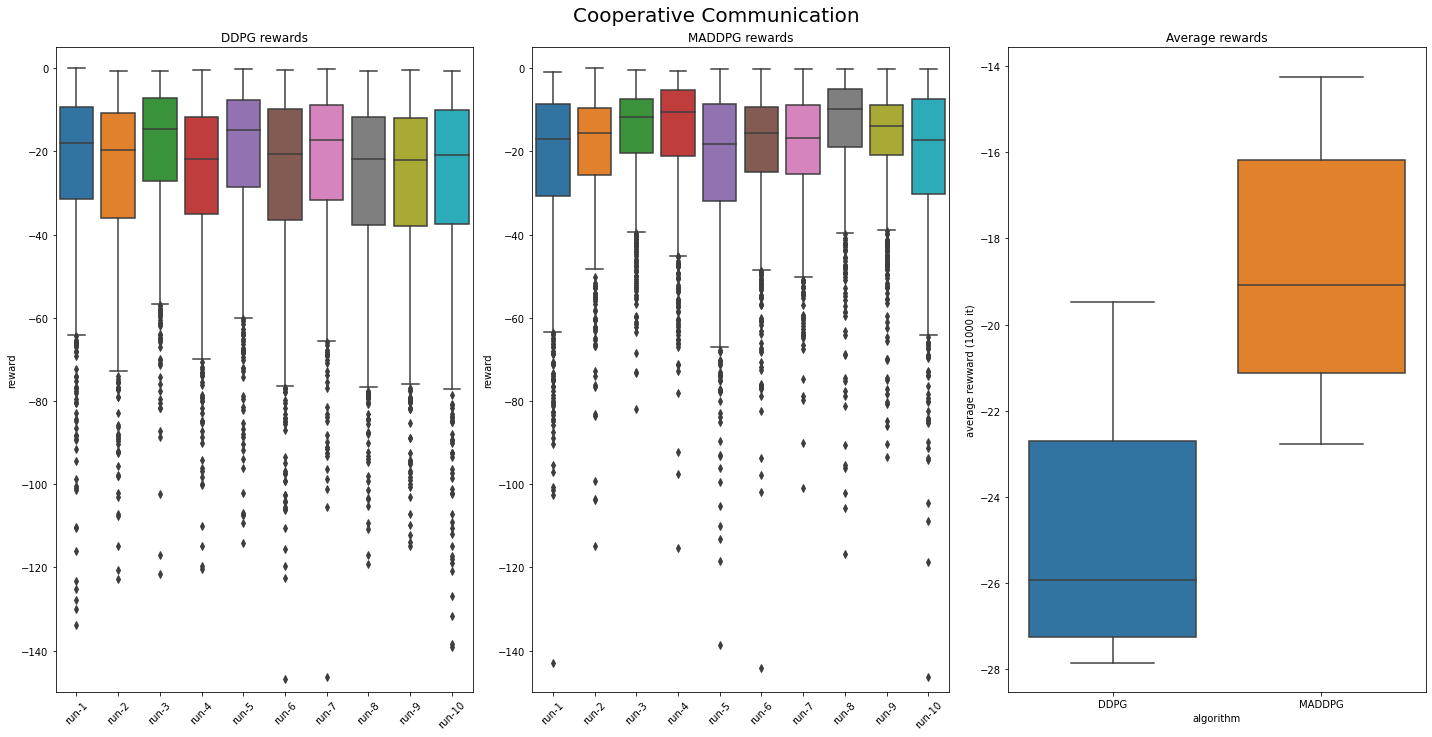

In [361]:
coop_comm_ddpg_files = [f'simple_speaker_listener/ddpg-run-{i}' for i in range(1,11)]
coop_comm_maddpg_files = [f'simple_speaker_listener/maddpg-run-{i}' for i in range(1,11)]

make_plots(coop_comm_ddpg_files, coop_comm_maddpg_files, 0, 'Cooperative Communication', (-150,5))

plt.savefig('plots/cooperative_communication_comparison.png', dpi=200)

## Simple Spread (64 units)

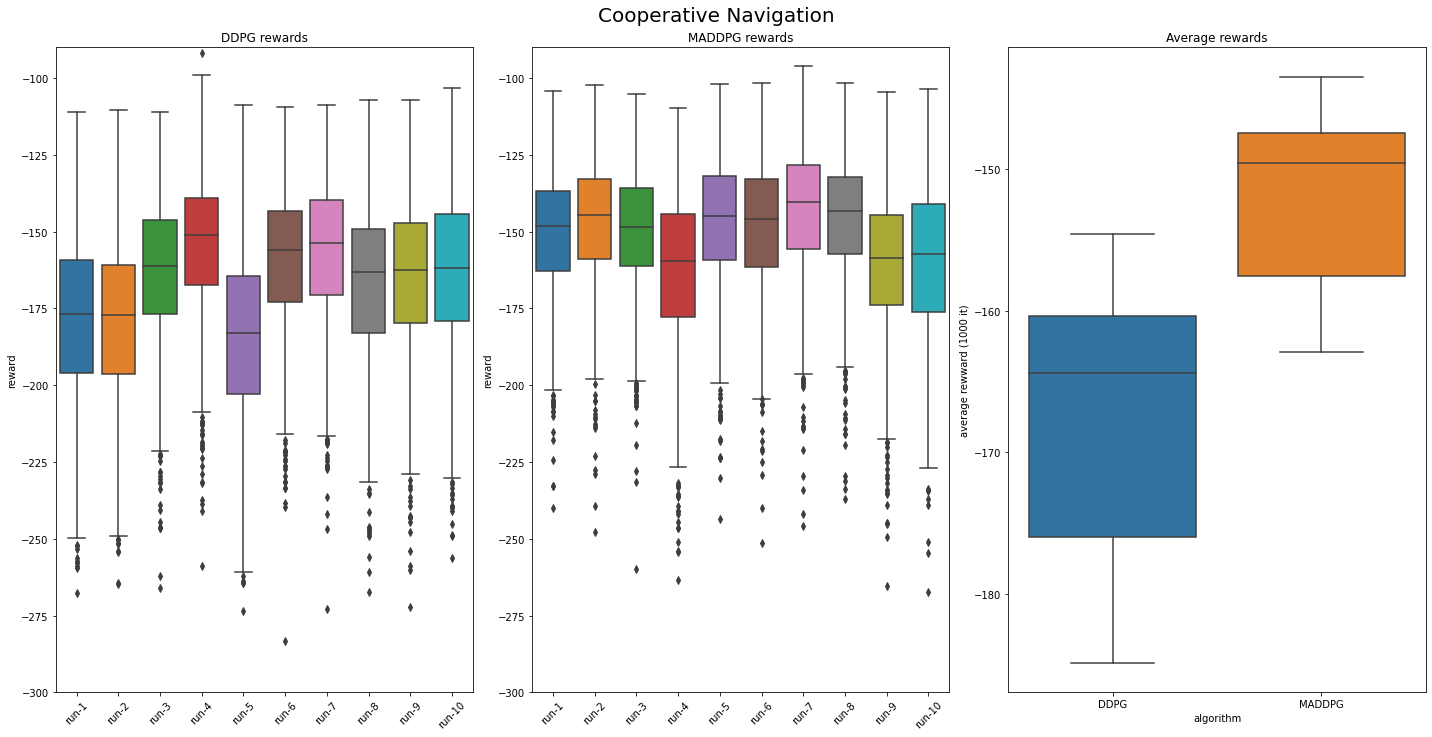

In [362]:
simple_spread_ddpg_files = [f'simple_spread/ddpg-run-{i}' for i in range(1,11)]
simple_spread_maddpg_files = [f'simple_spread/maddpg-run-{i}' for i in range(1,11)]

make_plots(simple_spread_ddpg_files, simple_spread_maddpg_files, 0, 'Cooperative Navigation', (-300,-90))

plt.savefig('plots/cooperative_navigation_comparison.png', dpi=200)

## Simple Spread (128 units in hidden layer)

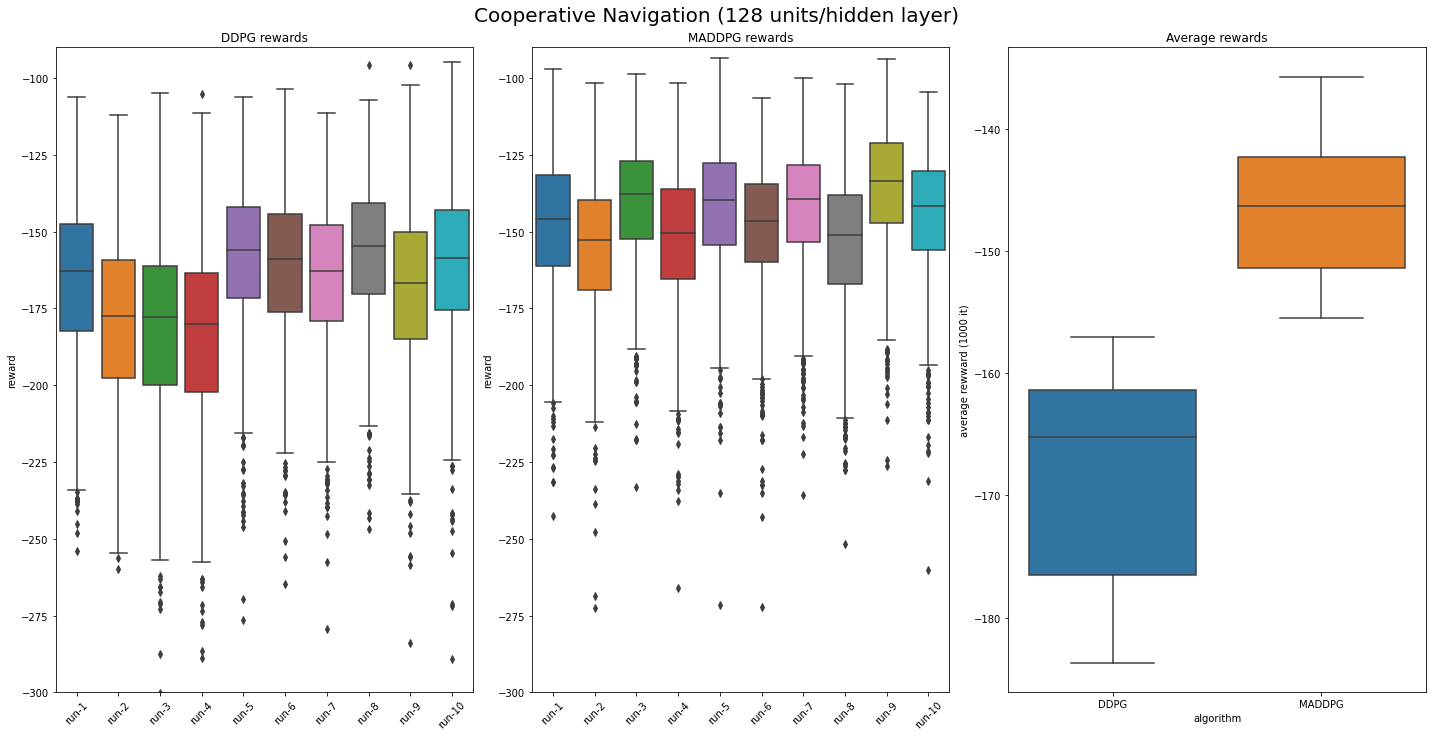

In [363]:
simple_spread_128_units_ddpg_files = [f'simple_spread_128_units/ddpg-run-{i}' for i in range(1,11)]
simple_spread_128_units_maddpg_files = [f'simple_spread_128_units/maddpg-run-{i}' for i in range(1,11)]

make_plots(simple_spread_128_units_ddpg_files, simple_spread_128_units_maddpg_files, 0, 'Cooperative Navigation (128 units/hidden layer)', (-300,-90))

plt.savefig('plots/cooperative_navigation_128_units_comparison.png', dpi=200)

## Simple Tag (64 units in hidden layer)

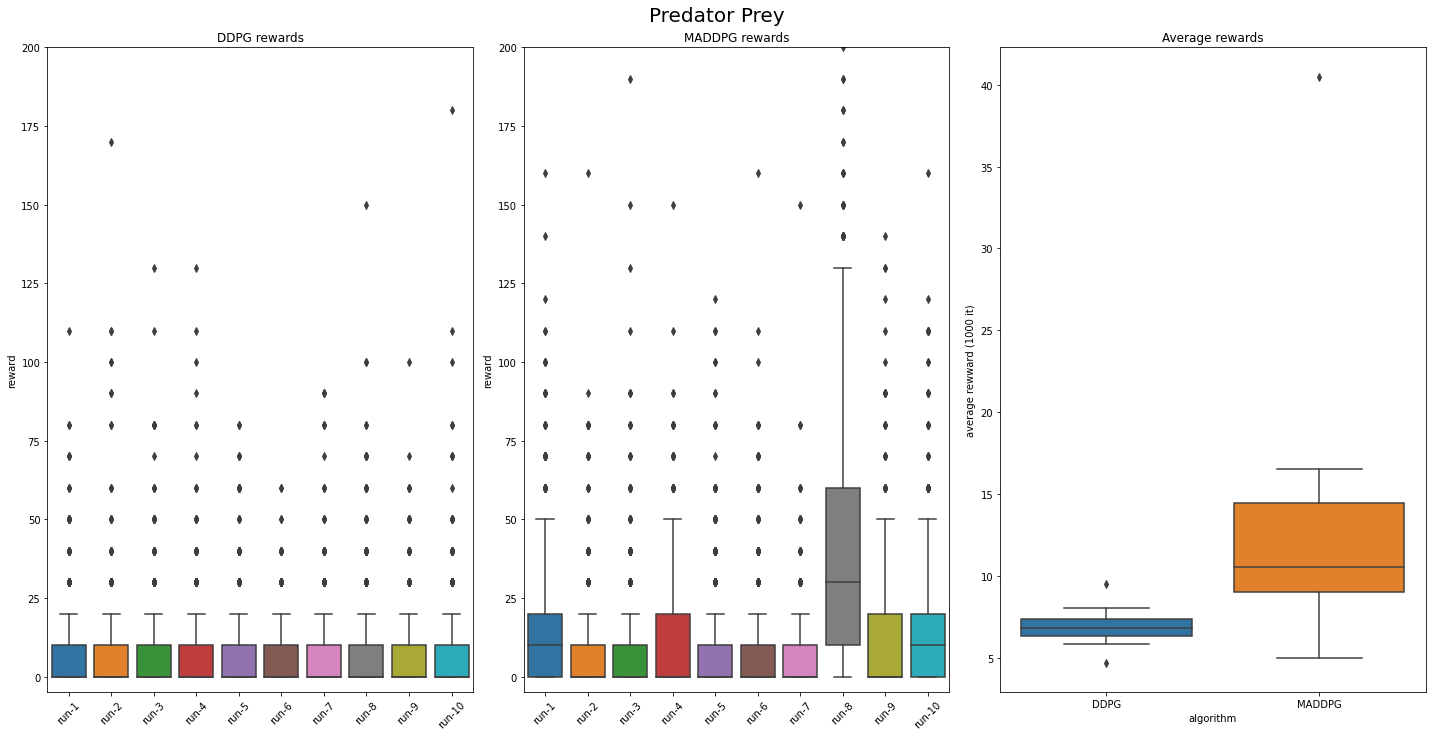

In [364]:
simple_tag_ddpg_files = [f'simple_tag/ddpg-vs-ddpg-run-{i}' for i in range(1,11)]
simple_tag_maddpg_files = [f'simple_tag/ddpg-vs-maddpg-run-{i}' for i in range(1,11)]

make_plots(simple_tag_ddpg_files, simple_tag_maddpg_files, 0, 'Predator Prey', (-5,200))

plt.savefig('plots/predator_prey_comparison.png', dpi=200)

## Simple Tag (128 units in hidden layer)

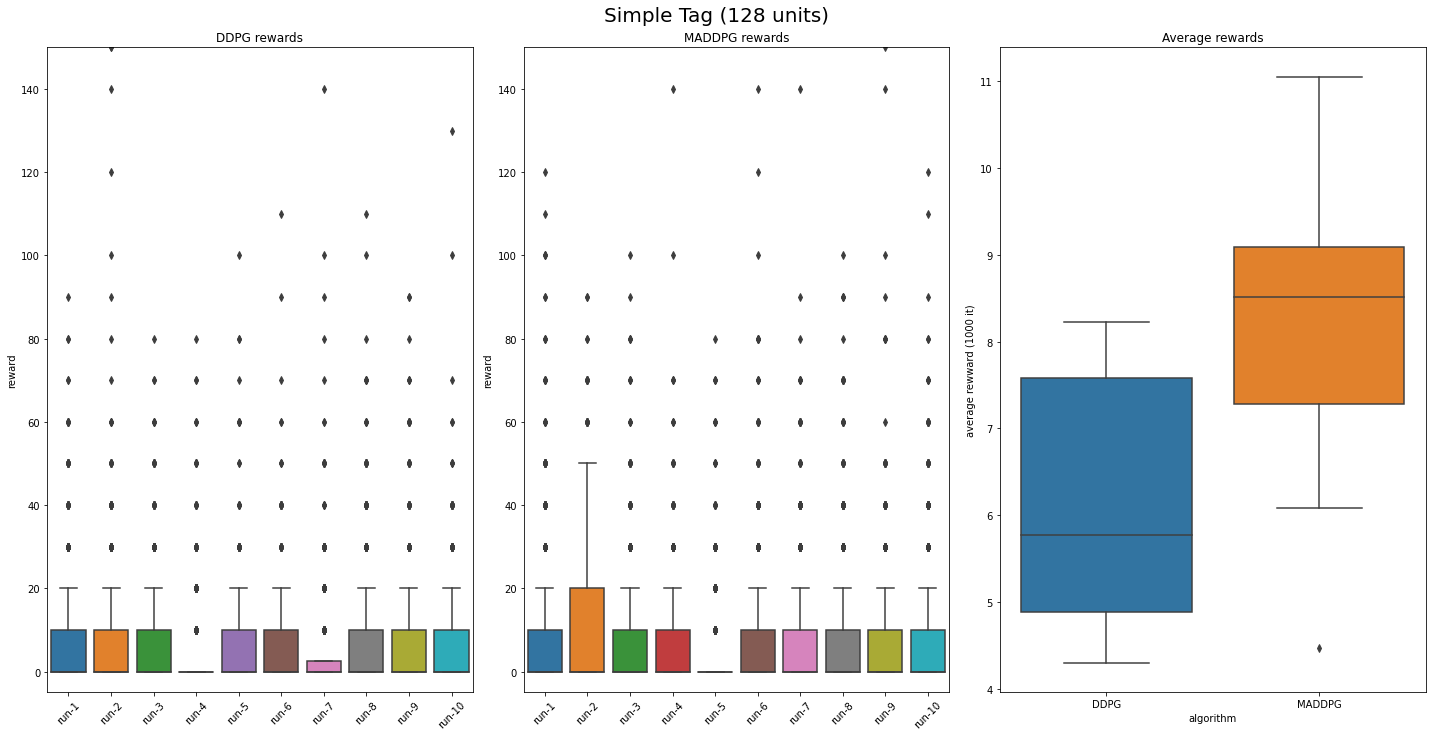

In [368]:
simple_tag_128_units_ddpg_files = [f'simple_tag_128_units/ddpg-vs-ddpg-run-{i}' for i in range(1,11)]
simple_tag_128_units_maddpg_files = [f'simple_tag_128_units/ddpg-vs-maddpg-run-{i}' for i in range(1,11)]

make_plots(simple_tag_128_units_ddpg_files, simple_tag_128_units_maddpg_files, 0, 'Simple Tag (128 units)', (-5,150))

plt.savefig('plots/predator_prey_128_units_comparison.png', dpi=200)

## Simple adversary

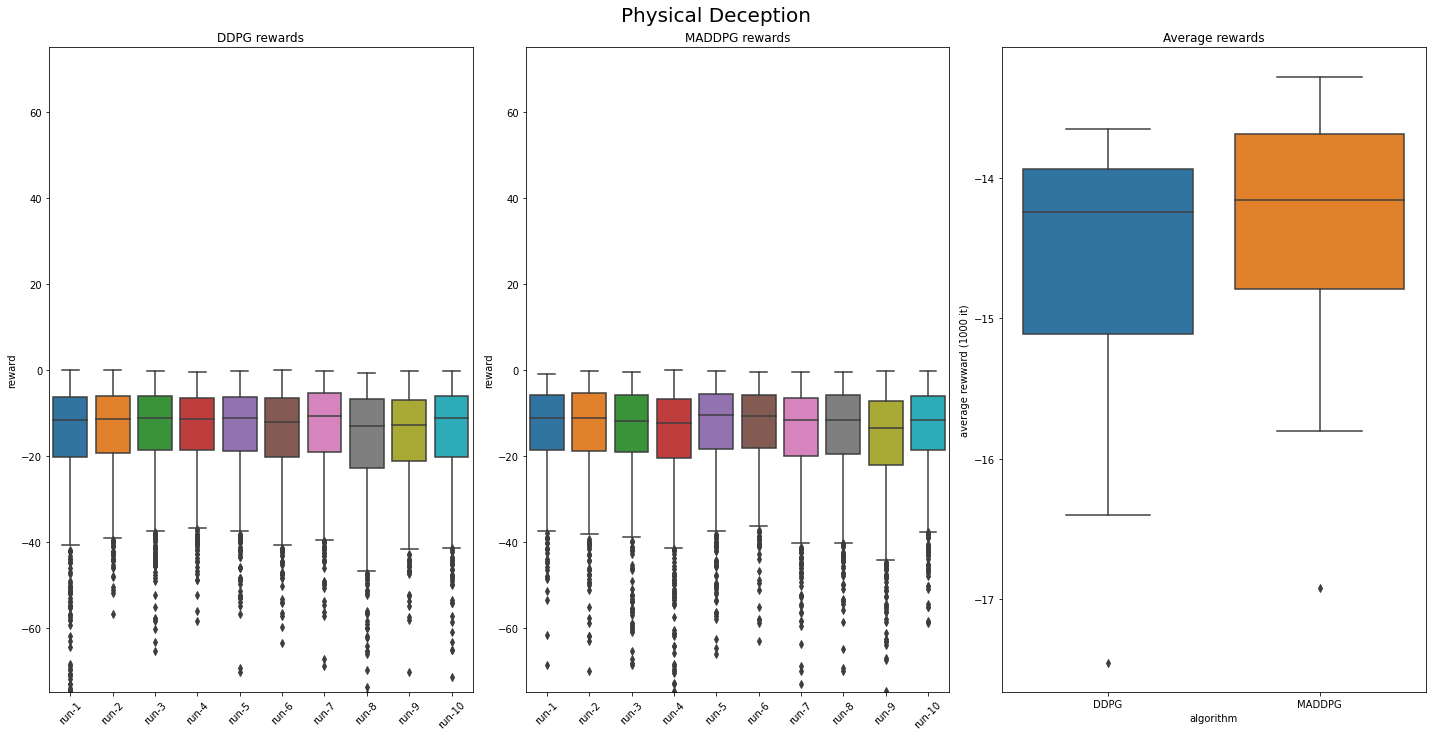

In [379]:
simple_adversary_ddpg_files = [f'simple_adversary/ddpg-vs-ddpg-run-{i}' for i in range(1,11)]
simple_adversary_maddpg_files = [f'simple_adversary/maddpg-vs-ddpg-run-{i}' for i in range(1,11)]

make_plots(simple_adversary_ddpg_files, simple_adversary_maddpg_files, 0, 'Physical Deception', (-75,75))

plt.savefig('plots/physical_deception_comparison.png', dpi=200)

## Simple Push

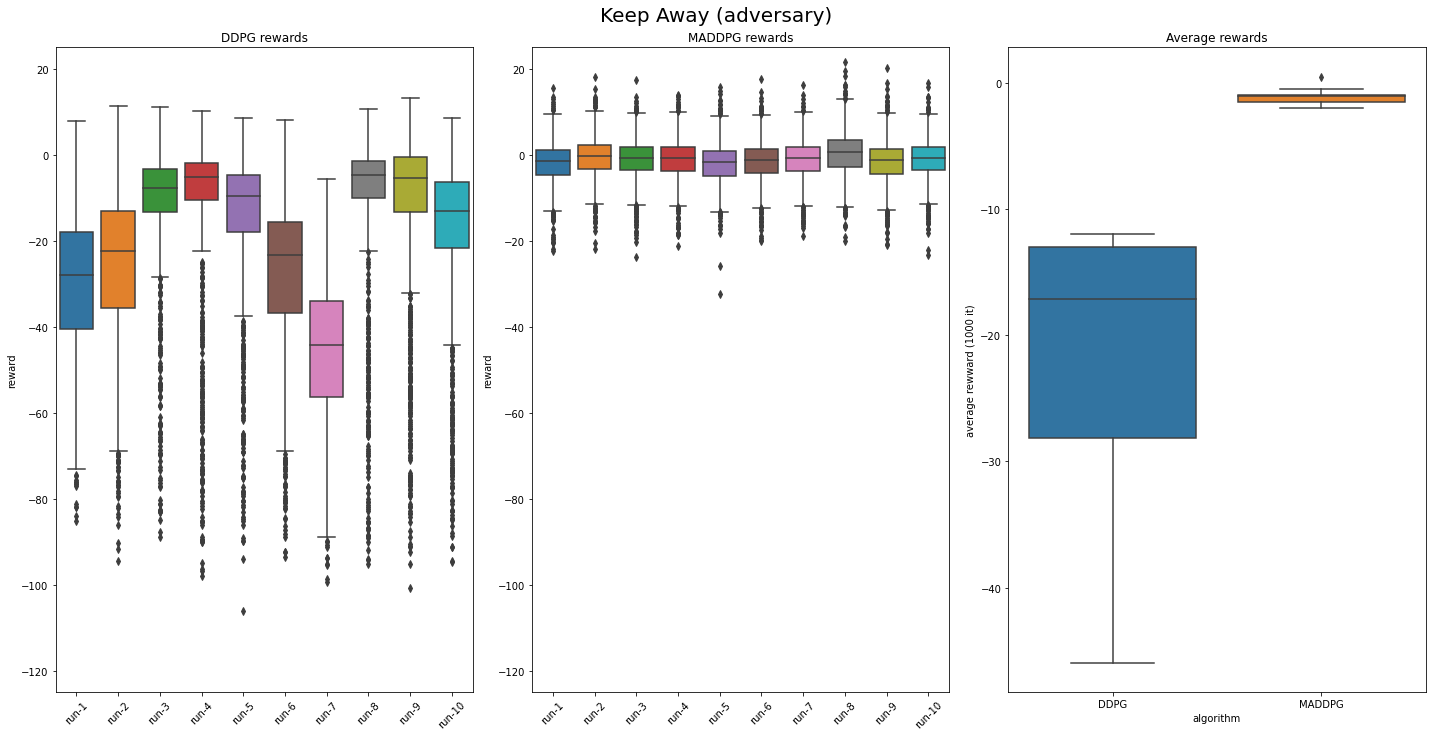

In [377]:
simple_push_ddpg_files = [f'simple_push/ddpg-vs-ddpg-run-{i}' for i in range(1,11)]
simple_push_maddpg_files = [f'simple_push/ddpg-vs-maddpg-run-{i}' for i in range(1,11)]

make_plots(simple_push_ddpg_files, simple_push_maddpg_files, 0, 'Keep Away (adversary)', (-125,25))

plt.savefig('plots/keep_away_comparison(adv).png', dpi=200)

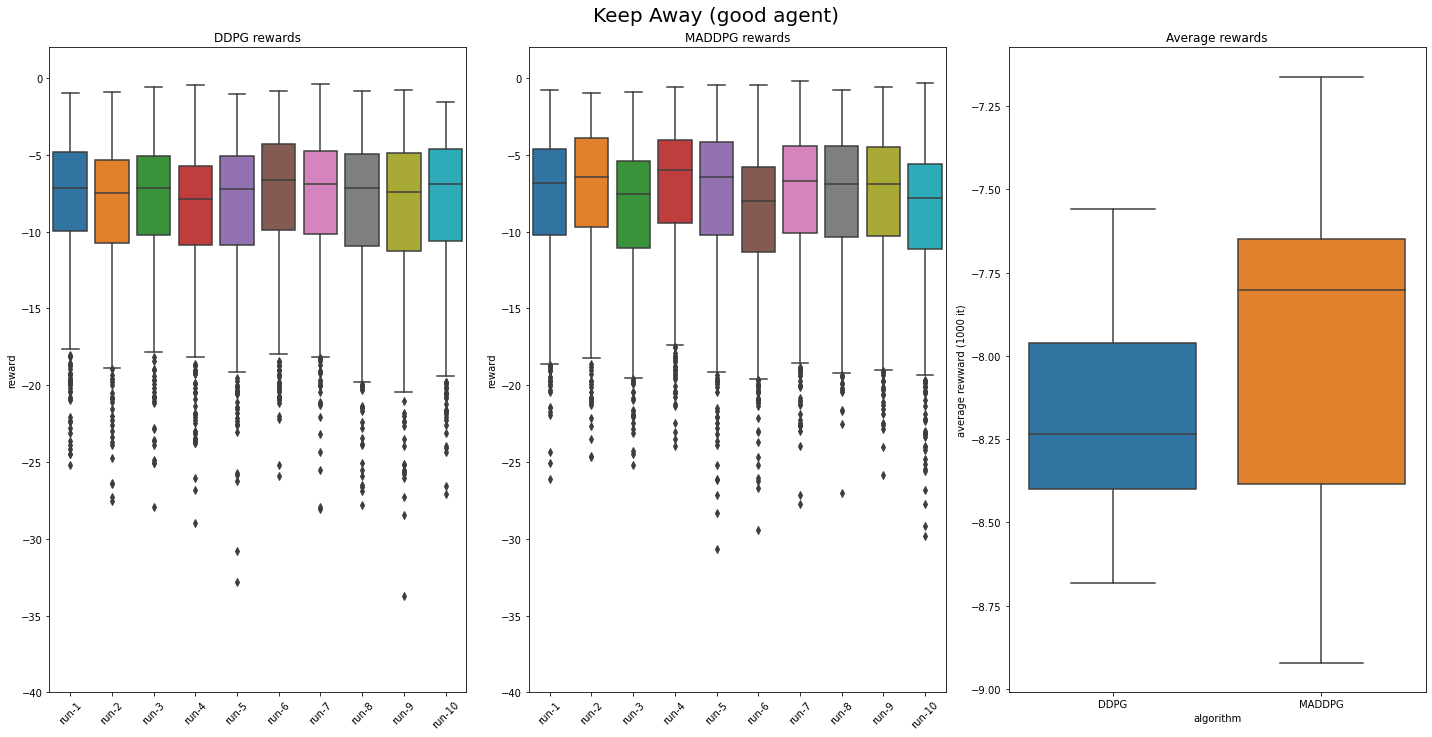

In [378]:
simple_push_ddpg_files = [f'simple_push/ddpg-vs-ddpg-run-{i}' for i in range(1,11)]
simple_push_maddpg_files = [f'simple_push/maddpg-vs-ddpg-run-{i}' for i in range(1,11)]

make_plots(simple_push_ddpg_files, simple_push_maddpg_files, 1, 'Keep Away (good agent)', (-40,2))

plt.savefig('plots/keep_away_comparison(good).png', dpi=200)